## Using Decision Tree and Random Forest for Digits Classification
Remember the MNIST dataset used in the Classification Exercise - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model hyperparameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).

**Questions:**

**1.** Choose which model hyperparameters (2-3) you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest. **DO NOT forget to create a validation set for this experiment**


In [1]:
# your code here
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', version=1, return_X_y=True, parser = 'pandas')
X_train,X_temp,y_train,y_temp = train_test_split(mnist[0],mnist[1], test_size = 0.4, random_state = 42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp, test_size = 0.5, random_state = 42)

In [3]:
max_depths = [5,10,15,20,25]
min_samples_splits = [30,40,50,70,100]
best_acc = 0
best_max_depth = 0
best_sample_split = 0
for max_depth in max_depths:
  for min_samples_split in min_samples_splits:
    tree_class = DecisionTreeClassifier(max_depth = max_depth,min_samples_split = min_samples_split)
    tree_class.fit(X_train,y_train)
    y_pred = tree_class.predict(X_val)
    acc = accuracy_score(y_val,y_pred)
    if acc > best_acc :
      best_acc = acc
      best_max_depth = max_depth
      best_sample_split = min_samples_splits





In [4]:
best_acc

0.8558571428571429

In [5]:
best_max_depth

15

In [6]:
min_samples_split

100

After running multiples times and with various values, we find that max_depth = 20 and min_samples_split=100 seems to be the most appropriate values for our parameters.


In [7]:
tree_class = DecisionTreeClassifier(max_depth = best_max_depth,min_samples_split = min_samples_split)
tree_class.fit(X_train,y_train)
y_pred = tree_class.predict(X_val)

print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1359
           1       0.91      0.94      0.92      1552
           2       0.80      0.79      0.79      1403
           3       0.79      0.81      0.80      1392
           4       0.80      0.83      0.82      1322
           5       0.81      0.76      0.79      1295
           6       0.89      0.85      0.87      1415
           7       0.90      0.87      0.88      1497
           8       0.75      0.76      0.75      1346
           9       0.81      0.81      0.81      1419

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000



In [8]:
max_depths = [5,10,15,20]
best_acc = 0
i = 0
criterions = ['gini','entropy','log_loss']
for max_depth in max_depths :
    for criterion in criterions:
      print(i)
      i+=1
      rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion)
      rf.fit(X_train,y_train)
      y_pred_rf = rf.predict(X_val)
      acc = accuracy_score(y_val,y_pred_rf)
      if acc > best_acc:
        best_acc = acc
        best_max_depth_rf = max_depth
        best_crit = criterion



0
1
2
3
4
5
6
7
8
9
10
11


In [9]:
best_acc

0.9648571428571429

In [10]:
criterion

'log_loss'

In [11]:
best_max_depth_rf

20

In [12]:
rf_best = RandomForestClassifier(max_depth = best_max_depth_rf,criterion = best_crit)
rf_best.fit(X_train,y_train)
y_pred_rf = rf_best.predict(X_val)
print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1359
           1       0.98      0.99      0.98      1552
           2       0.95      0.97      0.96      1403
           3       0.95      0.94      0.95      1392
           4       0.97      0.96      0.96      1322
           5       0.96      0.96      0.96      1295
           6       0.98      0.99      0.98      1415
           7       0.97      0.96      0.97      1497
           8       0.96      0.95      0.96      1346
           9       0.94      0.94      0.94      1419

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



After running randomforest for different depth of trees and different criterion, we find out that based on accuracy, the best criterion is 'log_loss' and the best depth of trees is 20.


**2.** Once you are satisfied with the model hyperparameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision. The end result should be an image that looks like a heatmap, that shows the most important pixels in the decision. **Explain the result**


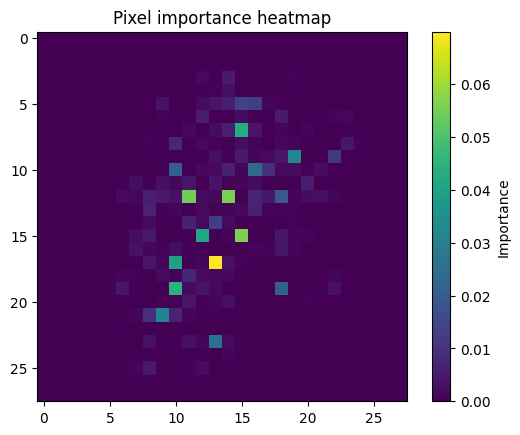

In [13]:
plt.imshow(np.reshape(tree_class.feature_importances_,(28,28)))
plt.title('Pixel importance heatmap')
plt.colorbar(label = 'Importance')
plt.show()

For the decision tree model,we can see that most of the pixels are useless in our model. For pixels between 100 and 300, we can see on the plot that a few pixels are important.

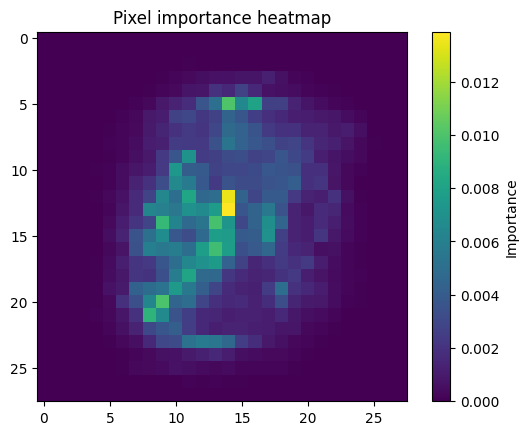

In [14]:
plt.imshow(np.reshape(rf_best.feature_importances_,(28,28)))
plt.title('Pixel importance heatmap')
plt.colorbar(label = 'Importance')
plt.show()

For the RandomForest model, we can see on the plot that many pixels have an importance. Pixels between 150 and 250 tends to have the more importance.

We can notice that on the decisiontree classifier, most of the features are ignored whereas on the randomforest classifier, most of the features are taken into consideration.

**3.** Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
Print, regardless of the digit, the mean +- std for the correctly classified samples, and the mean +- std for the misclassified samples.

*The end result should look like:*

Error class probability: mean_proba (+/- std_proba)
Correct class probability: mean_proba (+/- std_proba)



#### decision tree :

##### correctly classified

In [15]:
y_pred_test_tc = tree_class.predict(X_test)

In [16]:
correct_indexes = np.where(y_test == y_pred_test_tc)[0]

In [17]:
pred_proba_correct = tree_class.predict_proba(X_test.iloc[correct_indexes])

In [18]:
pred_proba_correct.mean()

0.10000000000000002

In [19]:
pred_proba_correct.std()

0.27983551953670366

##### incorrectly classified

In [20]:
incorrect_indexes = np.where(y_test != y_pred_test_tc)[0]

In [21]:
pred_proba_incorrect = tree_class.predict_proba(X_test.iloc[incorrect_indexes])

In [22]:
pred_proba_incorrect.mean()

0.1

In [23]:
pred_proba_incorrect.std()

0.19651804851862512

In [24]:
print(f'Error class probability : {pred_proba_incorrect.mean().round(3)} (+/- {pred_proba_incorrect.std().round(3)}) Correct class probability : {pred_proba_correct.mean().round(3)} (+/- {pred_proba_correct.std().round(3)})')

Error class probability : 0.1 (+/- 0.197) Correct class probability : 0.1 (+/- 0.28)


#### random forest :

In [25]:
y_pred_test_rf = rf_best.predict(X_test)


##### correctly classified :

In [26]:
correct_indexes = np.where(y_pred_test_rf == y_test)[0]

In [27]:
pred_proba_rf_correct = rf_best.predict_proba(X_test)


In [28]:
pred_proba_rf_correct.mean()

0.10000000000000002

In [29]:
pred_proba_rf_correct.std()

0.2495034987845609

##### incorrectly classified :

In [30]:
incorrect_indexes = np.where(y_pred_test_rf !=y_test)[0]

In [31]:
pred_proba_rf_incorrect = rf_best.predict_proba(X_test)

In [32]:
pred_proba_rf_incorrect.mean()

0.10000000000000002

In [33]:
pred_proba_rf_incorrect.std()

0.2495034987845609

In [34]:
print(f'Error class probability : {pred_proba_rf_incorrect.mean().round(3)} (+/- {pred_proba_rf_incorrect.std().round(3)}) Correct class probability : {pred_proba_rf_correct.mean().round(3)} (+/- {pred_proba_rf_correct.std().round(3)})')

Error class probability : 0.1 (+/- 0.25) Correct class probability : 0.1 (+/- 0.25)


**4.** Discuss your results.

The result we get are quite similar for decision tree and random forest classifiers. We get the same mean proba to classify samples correctly or incorrectly and quite the same std too.